# Model Performance Evaluation
In this notebook we seek to evaluate the performance of different models using a range of different metrics. The most basic of which are Punzi scans, predicted probability distributions, Kolmogrov-Smirnov tests and ROC curves.

In [1]:
import tensorflow as tf
import sys
sys.path.append('../')
from dataflow import Flow
import plotter as ptr
import xgboost as xgb
from sklearn.metrics import roc_curve

In [2]:
version = "6.0.3"
fname = f'../data_files/{version}'
my_flow = Flow(None, None, None, csv_path=f'{fname}.csv')
(X_train, y_train), (X_val, y_val), (X_test, y_test) = my_flow.get_train_val_test_split()

train = X_train.copy()
train['category'] = y_train

val = X_val.copy()
val['category'] = y_val

test = X_test.copy()
test['category'] = y_test

In [3]:
from joblib import load

my_nn_model = tf.keras.models.load_model(f'../neural_network/models/v{version}')
my_xgb_model = xgb.XGBClassifier()
my_xgb_model.load_model(f"../classification_methods/models/XGB_{version}.json")
my_knn_model = load('../classification_methods/models/KNN_6.0.3.joblib')
my_models = [my_xgb_model, my_nn_model, my_knn_model]

2022-03-04 16:02:46.987896: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-04 16:02:47.000893: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


dict_keys(['NN', 'KNN', 'XGB'])


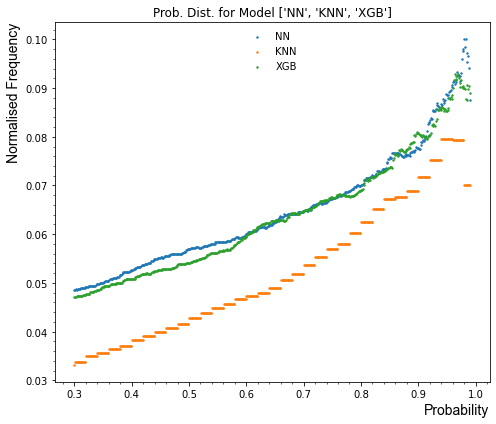

In [6]:
myPlotter = ptr.PunziMetric(train, val, test, [0.3, 0.99], npoints=500)
myPlotter.plot_singular([my_nn_model, my_knn_model, my_xgb_model], ['NN', 'KNN', 'XGB'], 'test')